Lektion 4

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("white")

#current_dir = os.path.abspath("")
#data_dir = os.path.join(current_dir, "data")

(390, 190, 4)

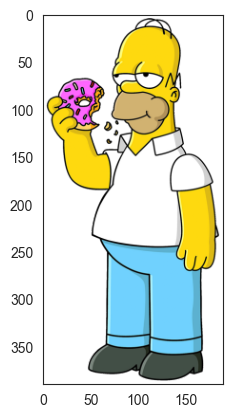

In [4]:
img = plt.imread(f"data/Homer_Simpson_2006.png")
plt.imshow(img)
img.shape

resizar bilden.

(195, 95, 4)

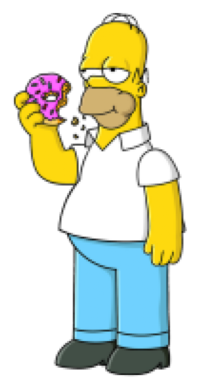

In [6]:
import cv2
resize_factor = 0.5
new_size = int(img.shape[1] * resize_factor), int(img.shape[0] * resize_factor)

img = cv2.resize(img, new_size)
plt.imshow(img)
plt.axis("off")
img.shape

In [7]:
edge_filter = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

blur_filter = np.array([[0.0625, 0.125, 0.0625],
                        [0.125, 0.25, 0.125],
                        [0.0625, 0.125, 0.0625]])

outline_filter = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3568628..2.3813725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.0..5.0].


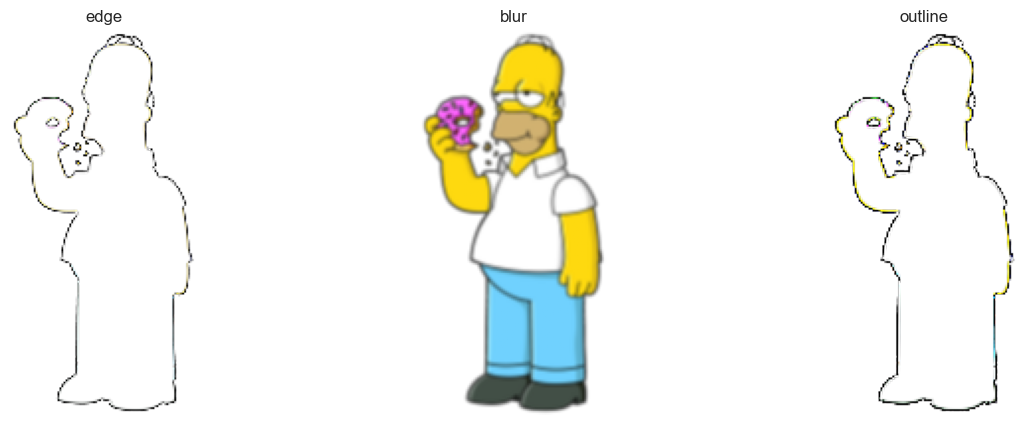

In [9]:
processed_images_path = "data/processed_images"
filters = [edge_filter, blur_filter, outline_filter]
filter_names = ["edge", "blur", "outline"]

try:
    os.makedirs(processed_images_path)
except FileExistsError:
    pass

fig, axes = plt.subplots(1, len(filters), figsize=(15, 5))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(img, -1, filter)
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set_title(filter_name)

fig.savefig("data/processed_images/processed_homer.png", bbox_inches="tight")

### Del 2 av föreläsningen:
#### MNIST dataset analys med CNN

In [10]:
import keras
from keras import layers
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
X_train = x_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype("float32") / 255
X_test = x_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype("float32") / 255

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) # 32 filters, 3x3 kernel => 32 nya matriser
x = layers.MaxPooling2D(pool_size=2)(x) # 2x2 pooling (minskar antalet pixlar med hälften)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x) # 64 filters, 3x3 kernel => 64 nya matriser
x = layers.MaxPooling2D(pool_size=2)(x) # 2x2 pooling (minskar antalet pixlar med hälften)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) # 128 filters, 3x3 kernel => 128 nya matriser
x = layers.Flatten()(x) # plattar till matriserna
outputs = layers.Dense(10, activation="softmax")(x) # 10 outputs, softmax för att få sannolikheter
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8711 - loss: 0.4086 - val_accuracy: 0.9807 - val_loss: 0.0654
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9852 - loss: 0.0462 - val_accuracy: 0.9880 - val_loss: 0.0454
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9907 - loss: 0.0313 - val_accuracy: 0.9915 - val_loss: 0.0338
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9932 - loss: 0.0227 - val_accuracy: 0.9923 - val_loss: 0.0311
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9952 - loss: 0.0154 - val_accuracy: 0.9913 - val_loss: 0.0312


In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9898 - loss: 0.0337


(0.026881879195570946, 0.991599977016449)